In [1]:
import math 
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
def forward_euler_system (h,n,t0,y0,f):
    Y = np.zeros([len(y0),n+1])
    tk = t0
    Y[:,0] = y0
    for k in range(0,n):
        Y[:,k+1] = Y[:,k] + h*f(tk,Y[:,k])
        tk += h
    return Y

def heuns(h,n, t0, y0, f):
    Y = np.zeros([len(y0),n+1])
    tk = t0
    Y[:,0] = y0
    for k in range(0,n):
        f1 = f(tk, Y[:,k])
        f2 = f(tk+h,Y[:,k]+h*f1)
        Y[:,k+1] = Y[:,k] + (h/2) * (f1+f2)
        tk += h
    return Y

def backward_euler_system_v1 (h,n,t0,y0,A):
    Y = np.zeros([len(y0),n+1])
    tk = t0
    Y[:,0] = y0d
    I = np.identity(len(y0))
    for k in range(0,n):
        Y[:,k+1] = linalg.inv(I-h*A) @ Y[:,k] 
    return Y


def backward_euler_system_v2 (h,n,t0,y0,A,b):
    Y = np.zeros([len(y0),n+1])
    tk = t0
    Y[:,0] = y0
    I = np.identity(len(y0))
    for k in range(0,n):
        Y[:,k+1] = linalg.inv(I-h*A) @ (Y[:,k] + h*b(tk+h))
        tk += h
    return Y



def implicit_trapezoid_system_v1 (h,n,t0,y0,A):
    Y = np.zeros([len(y0),n+1])
    tk = t0
    Y[:,0] = y0
    I = np.identity(len(y0))
    for k in range(0,n):
        Y[:,k+1] = linalg.inv(I-(h/2)*A) @ (I+(h/2)*A) @ Y[:,k] 
    return Y

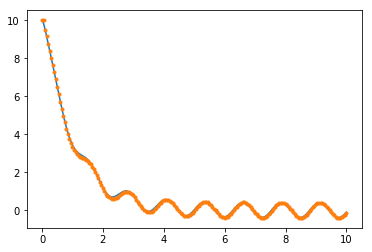

In [3]:
def my_exact(t):
    return (1075/104)*np.exp(-t) - (35/104)*np.exp(-25*t) + (5/13)*np.sin(5*t)

def my_fun(t,y):
    A = np.array([[0,1],[-25,-26]])
    b = np.array([0,50*np.cos(5*t)])
    return A @ y + b

h = 0.05
n = 200
y0 = np.array([10,0])
Y = forward_euler_system (h,n,0,y0,my_fun)
t_approx = np.array(range(0,n+1))*h
t_exact = np.linspace(0,10,1000)
y = my_exact(t_exact)
plt.plot (t_exact,y)
plt.plot (t_approx,Y[0],'.')

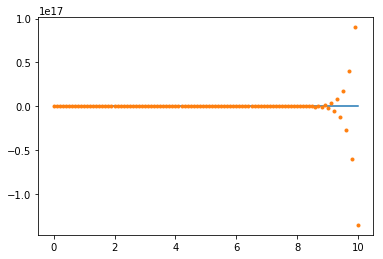

In [5]:
h = 0.1
n = 100
y0 = np.array([10,0])
Y = forward_euler_system (h,n,0,y0,my_fun)
t_approx = np.array(range(0,n+1))*h
t_exact = np.linspace(0,10,1000)
y = my_exact(t_exact)
plt.plot (t_exact,y)
plt.plot (t_approx,Y[0],'.')

In [13]:
def backward_euler_system_v1 (h,n,t0,y0,A):
    Y = np.zeros([len(y0),n+1])
    tk = t0
    Y[:,0] = y0
    I = np.identity(len(y0))
    for k in range(0,n):
        Y[:,k+1] = linalg.inv(I-h*A) @ Y[:,k] 
    return Y

In [14]:
def my_funT(t,y):
    A = np.array([[-2,-3],[0,1]])
    b = np.array([0,8*t])
    return A @ y + b

A = np.array([[-2,-3],[0,1]]) + y0
h = 0.5
n = 10
y0 = np.array([1,-1])
Y = backward_euler_system_v1 (h,n,0,y0,my_funT)
print(Y[:,1])

TypeError: unsupported operand type(s) for *: 'float' and 'function'

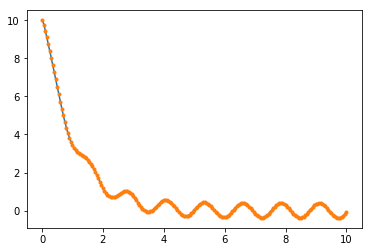

In [7]:
h = 0.05
n = 200
y0 = np.array([10,0])
Y = heuns(h,n,0,y0,my_fun)
t_approx = np.array(range(0,n+1))*h
t_exact = np.linspace(0,10,1000)
y = my_exact(t_exact)
plt.plot (t_exact,y)
plt.plot (t_approx,Y[0],'.')

In [ ]:
#works for h = 0.05

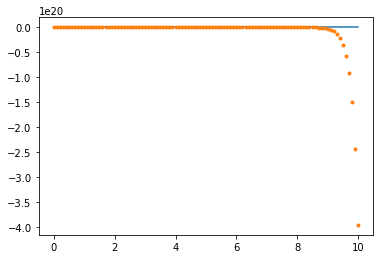

In [9]:
h = 0.1
n = 100
y0 = np.array([10,0])
Y = heuns(h,n,0,y0,my_fun)
t_approx = np.array(range(0,n+1))*h
t_exact = np.linspace(0,10,1000)
y = my_exact(t_exact)
plt.plot (t_exact,y)
plt.plot (t_approx,Y[0],'.')

In [ ]:
# doesn't work for h = 0.1

In [21]:
def myfun_b(t):
    b = np.array([0, 50*np.cos(5*t)])
    return b

In [28]:
def backward_euler_system_v2 (h,n,t0,y0,A,b):
    Y = np.zeros([len(y0),n+1])
    tk = t0
    Y[:,0] = y0
    I = np.identity(len(y0))
    for k in range(0,n):
        Y[:,k+1] = linalg.inv(I-h*A) @ (Y[:,k] + h*b(tk+h))
        tk += h
    return Y

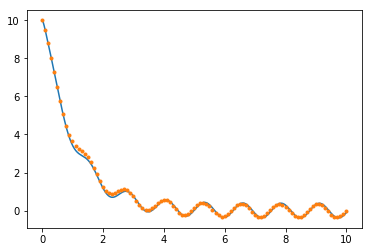

In [29]:
h = 0.1
n = 100
myA = np.array([[0,1],[-25,-26]])
y0 = np.array([10,0])
Y = backward_euler_system_v2(h,n,0,y0,myA, myfun_b)
t_approx = np.array(range(0,n+1))*h
t_exact = np.linspace(0,10,1000)
y = my_exact(t_exact)
plt.plot (t_exact,y)
plt.plot (t_approx,Y[0],'.')

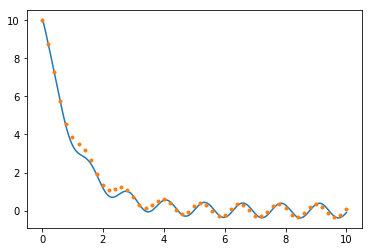

In [30]:
h = 0.2
n = 50
myA = np.array([[0,1],[-25,-26]])
y0 = np.array([10,0])
Y = backward_euler_system_v2(h,n,0,y0,myA, myfun_b)
t_approx = np.array(range(0,n+1))*h
t_exact = np.linspace(0,10,1000)
y = my_exact(t_exact)
plt.plot (t_exact,y)
plt.plot (t_approx,Y[0],'.')

In [31]:
def implicit_trapezoid_system_v2 (h,n,t0,y0,A, myfunB_2):
    Y = np.zeros([len(y0),n+1])
    tk = t0
    Y[:,0] = y0
    I = np.identity(len(y0))
    for k in range(0,n):
        Y[:,k+1] = linalg.inv(I-(h/2)*A) @ (I+(h/2)*A) @ Y[:,k] 
    return Y

In [ ]:
h = 0.2
n = 50
myA = np.array([[0,1],[-25,-26]])
y0 = np.array([10,0])
Y = implicit_trapezoid_system_v2(h,n,0,y0,myA, myfun_b)
t_approx = np.array(range(0,n+1))*h
t_exact = np.linspace(0,10,1000)
y = my_exact(t_exact)
plt.plot (t_exact,y)
plt.plot (t_approx,Y[0],'.')